# Visualizations

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from importnb import Notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from collections import Counter


with Notebook():
    import Preliminary_Model

from collections import Counter

weather_genre_dict = {}
top_genre_dict = {}

for weather, cluster in Preliminary_Model.weather_to_cluster.items():
    recommendations = Preliminary_Model.recommend_movies(weather)
    genre_list = recommendations['genres'].tolist()  # Nested list of genres
    flat_genre_list = [genre for sublist in genre_list for genre in sublist]  # Flatten it
    genre_counts = Counter(flat_genre_list)
    
    # Sort genres by frequency (descending)
    sorted_genres_with_counts = genre_counts.most_common()
    weather_genre_dict[weather] = sorted_genres_with_counts  # Preserve sorted order
    
    # Store the top genre and its count for each weather
    top_genre, top_count = sorted_genres_with_counts[0]
    top_genre_dict[weather] = (top_genre, top_count)

print(weather_genre_dict)
print(top_genre_dict)
# Convert to a DataFrame for easier plotting
df_top_genres = pd.DataFrame.from_dict(
    top_genre_dict, orient="index", columns=["Top Genre", "Frequency"]
).reset_index()
df_top_genres.rename(columns={"index": "Weather"}, inplace=True)

{'Clear Sky': [('Comedy', 5), ('Romance', 3), ('Fantasy', 2), ('Science Fiction', 1), ('Music', 1), ('Documentary', 1), ('Family', 1)], 'Few Clouds': [('Comedy', 5), ('Romance', 2), ('Science Fiction', 1), ('Fantasy', 1), ('Music', 1), ('Crime', 1), ('Documentary', 1), ('Family', 1)], 'Scattered Clouds': [('Crime', 5), ('Romance', 5), ('Drama', 4), ('Thriller', 1)], 'Broken Clouds': [('Comedy', 2), ('Romance', 2), ('War', 1)], 'Shower Rain': [('Drama', 2), ('Romance', 2), ('Documentary', 2), ('Crime', 1), ('Adventure', 1), ('Music', 1)], 'Rain': [('Music', 2), ('Documentary', 2), ('War', 1), ('Comedy', 1), ('Fantasy', 1), ('Romance', 1), ('Adventure', 1)], 'Thunderstorm': [('War', 1), ('Comedy', 1), ('Romance', 1), ('Drama', 1), ('Animation', 1), ('Family', 1), ('Thriller', 1)], 'Snow': [('Comedy', 2), ('Music', 2), ('Romance', 2), ('Fantasy', 1), ('Adventure', 1), ('Documentary', 1), ('Drama', 1)], 'Mist': [('Drama', 2), ('Animation', 1), ('Family', 1), ('Comedy', 1), ('Documentary', 

### Top Genres per Weather

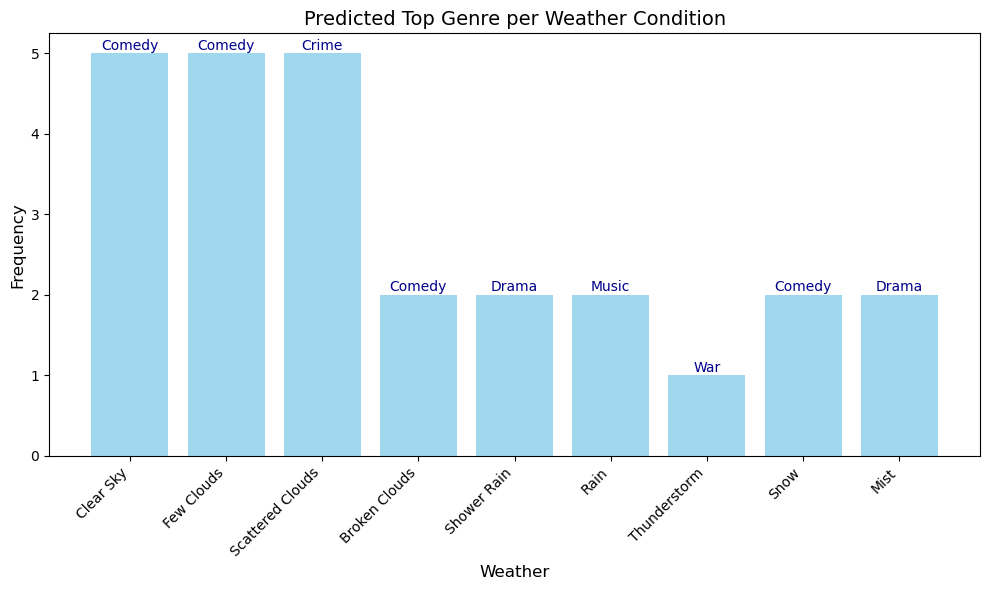

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(
    df_top_genres["Weather"], 
    df_top_genres["Frequency"], 
    color="skyblue", 
    alpha=0.8
)

# Add labels to the bars
for bar, genre in zip(bars, df_top_genres["Top Genre"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 0.01, 
        genre, 
        ha="center", 
        va="bottom", 
        fontsize=10, 
        color="darkblue"
    )

# Set plot labels and title
plt.title("Predicted Top Genre per Weather Condition", fontsize=14)
plt.xlabel("Weather", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.savefig("images/predicted/predicted_genre_per_weather.png", dpi=300, bbox_inches='tight')
plt.show()


/var/folders/kc/8mtwnxt93zd23ds7t09t29br0000gn/T/ipykernel_32258/453183952.py:29: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



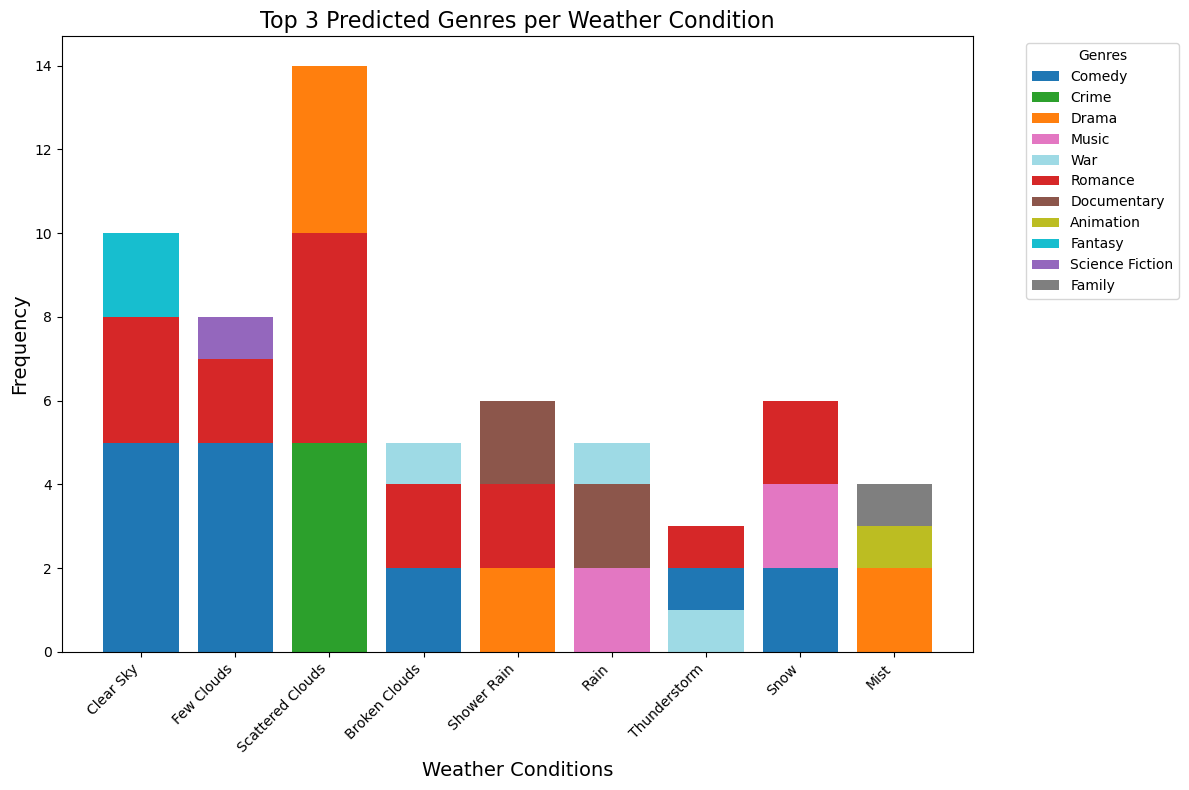

In [ ]:
# Set the value of k (number of top genres to extract)
k = 3
top_k_genres_per_weather = {}

# Extract the top k genres for each weather
for weather, genre_counts in weather_genre_dict.items():
    top_k_genres_per_weather[weather] = genre_counts[:k]  # Already sorted

# Prepare the data for plotting
weather_labels = list(top_k_genres_per_weather.keys())  # Weather types
genre_names = []
genre_counts = []

for weather in weather_labels:
    genres, counts = zip(*top_k_genres_per_weather[weather])  # Separate names and counts
    genre_names.append(genres)
    genre_counts.append(counts)


fig, ax = plt.subplots(figsize=(12, 8))
bottoms = [0] * len(weather_labels)

# Create a dynamic color palette
all_genres = {genre for weather_genres in genre_names for genre in weather_genres}
num_genres = len(all_genres)

# Use a larger colormap or generate a unique set of colors
if num_genres <= 20:  
    color_map = cm.get_cmap('tab20', num_genres)
else:  # Generate a custom colormap with enough unique colors
    colors = cm.get_cmap('hsv', num_genres)(np.linspace(0, 1, num_genres))
    color_map = mcolors.ListedColormap(colors)

genre_to_color = {genre: color_map(i) for i, genre in enumerate(all_genres)}

added_genres = set()

# Loop through the top k genres
for i in range(k):
    # For each weather condition, get the count for the i-th genre or use 0 if it doesn't exist
    genre_group = [
        genre_counts[j][i] if i < len(genre_counts[j]) else 0 
        for j in range(len(weather_labels))
    ]
    
    # For each weather condition, get the genre name for the i-th genre or use None
    genre_labels = [
        genre_names[j][i] if i < len(genre_names[j]) else f"Genre {i + 1}"
        for j in range(len(weather_labels))
    ]
    
    for weather_idx, (genre, count) in enumerate(zip(genre_labels, genre_group)):
        if count > 0: 
            ax.bar(
                weather_labels[weather_idx], 
                count, 
                label=genre if genre not in added_genres else None,
                bottom=bottoms[weather_idx],
                color=genre_to_color[genre],
            )
            if genre not in added_genres:
                added_genres.add(genre)

    # Update the bottoms list for stacking
    bottoms = [b + g for b, g in zip(bottoms, genre_group)]

# Add labels and title
ax.set_xlabel('Weather Conditions', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title(f"Top {k} Predicted Genres per Weather Condition", fontsize=16)

# Add the legend using unique genres
ax.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("images/predicted/top_k_predicted_genres_per_weather.png", dpi=300, bbox_inches='tight')
plt.show()

### Word Clouds
Word cloud where the size of each genre corresponds to its frequency for a specific weather condition

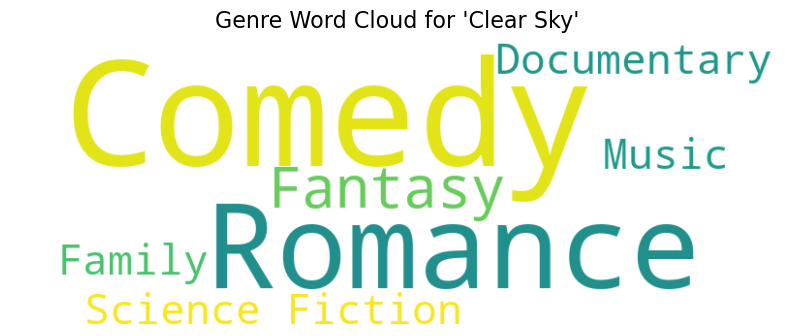

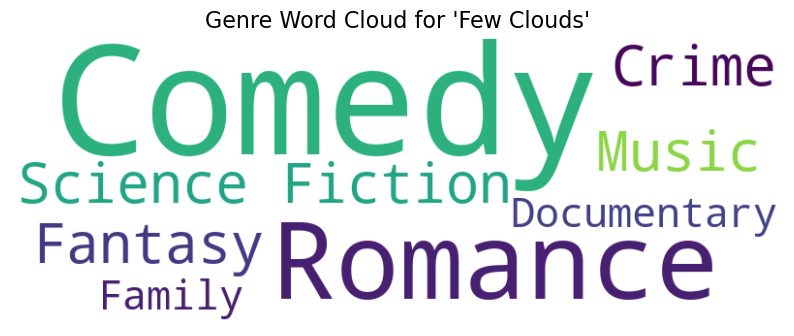

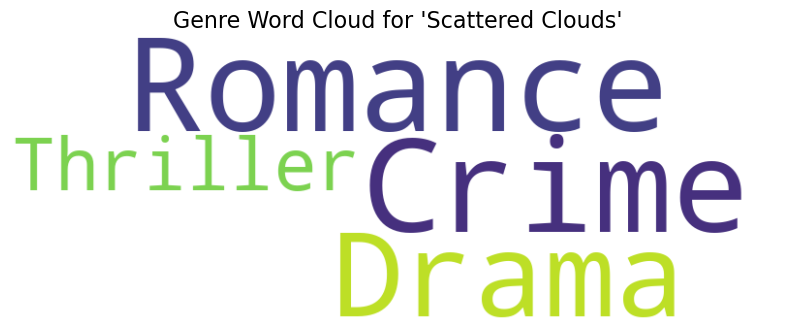

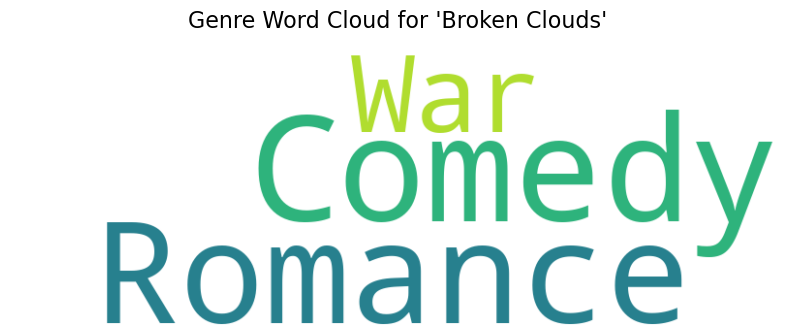

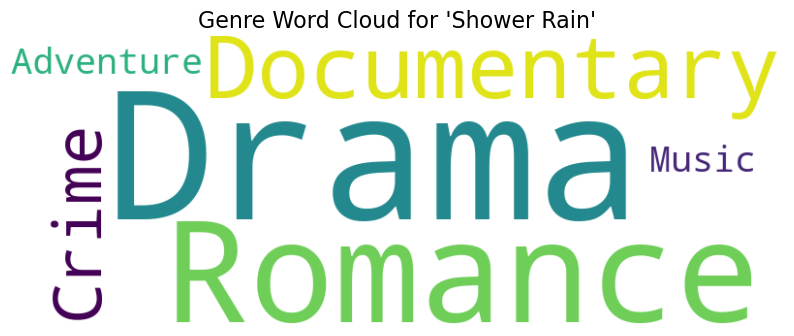

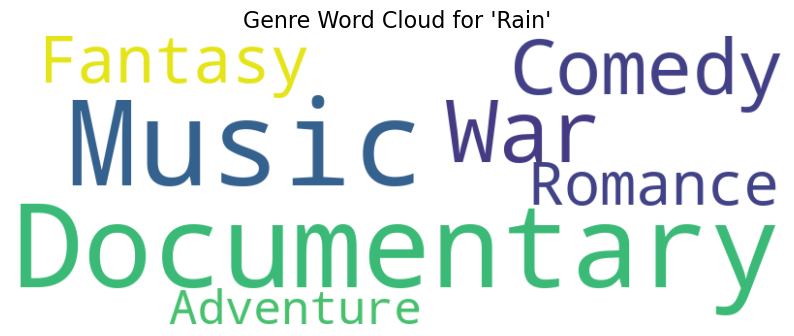

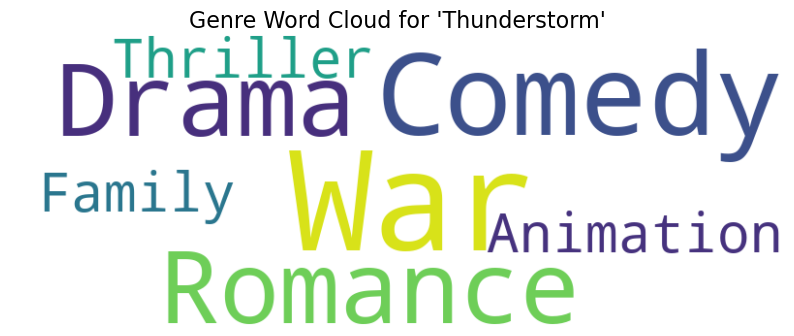

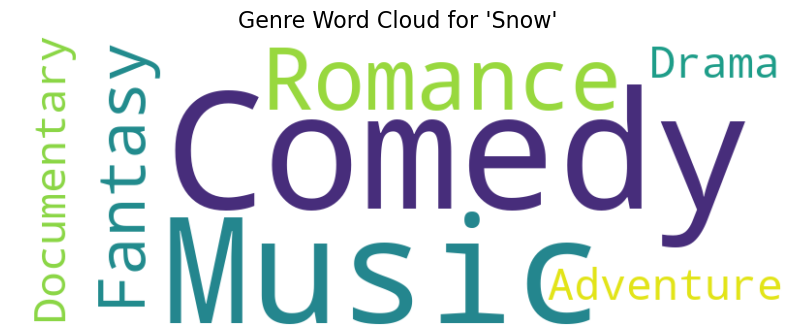

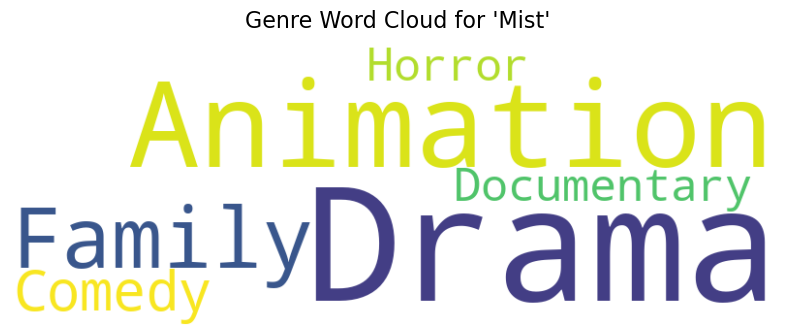

In [ ]:
from wordcloud import WordCloud

# Generate word clouds for all weather types
for weather, genre_list in weather_genre_dict.items():
    # Convert list of tuples to a dictionary (genre: count)
    genre_counts = dict(genre_list)

    # Create word cloud from frequencies
    wordcloud = WordCloud(width=800, height=300, background_color='white').generate_from_frequencies(genre_counts)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Genre Word Cloud for '{weather}'", fontsize=16)
    plt.savefig("images/predicted/wordclouds/word_cloud_" +weather+ ".png", dpi=300, bbox_inches='tight')
    plt.show()
    print("\n")

### Heatmap

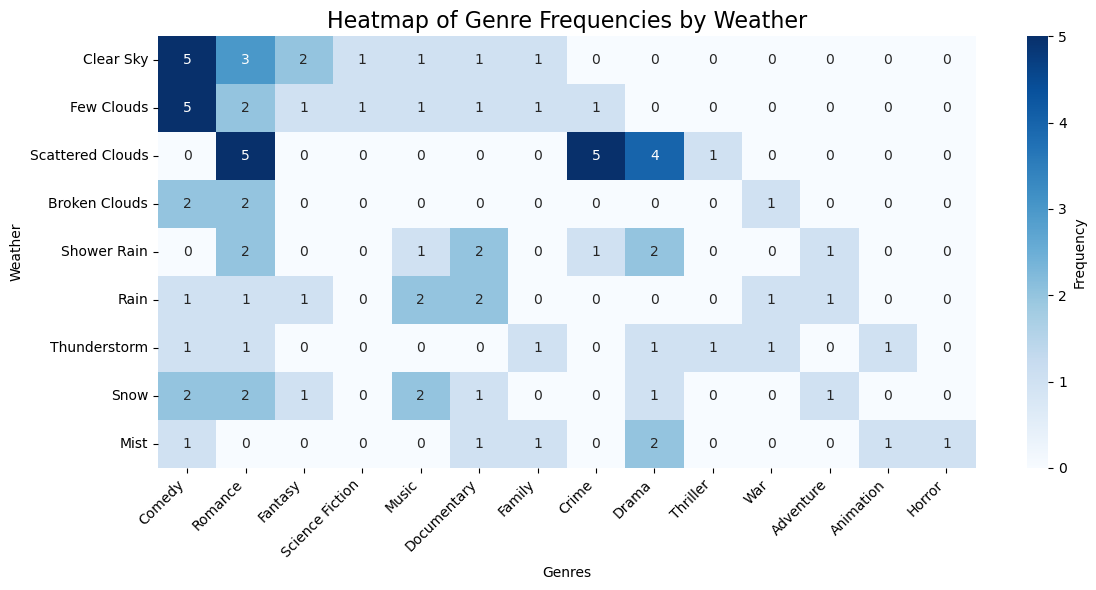

In [ ]:
import seaborn as sns

# Prepare data for the heatmap
weather_genre_matrix = {}

# Convert weather_genre_dict into a matrix format
for weather, genre_list in weather_genre_dict.items():
    genre_counts = dict(genre_list)  # Convert list of tuples to dictionary
    weather_genre_matrix[weather] = genre_counts

# Create DataFrame with genres as columns and weather types as rows
weather_genre_df = pd.DataFrame(weather_genre_matrix).fillna(0).T  # Transpose to match desired format

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(weather_genre_df, annot=True, fmt=".0f", cmap="Blues", cbar_kws={'label': 'Frequency'})
plt.title("Heatmap of Genre Frequencies by Weather", fontsize=16)
plt.ylabel("Weather")
plt.xlabel("Genres")
plt.xticks(rotation=45, ha='right')  # Rotate genre labels for readability
plt.tight_layout()
plt.savefig("images/predicted/genre_frequencies_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

### Sunburst for Weather Genre Breakdown

In [ ]:
import plotly.express as px

# Prepare data for the sunburst chart
sunburst_data = []

# Convert weather_genre_dict into a list of dictionaries for each weather-genre pair
for weather, genre_list in weather_genre_dict.items():
    for genre, count in genre_list:
        sunburst_data.append({'Weather': weather, 'Genre': genre, 'Count': count})

# Create a DataFrame
sunburst_df = pd.DataFrame(sunburst_data)

# Create the sunburst chart
fig = px.sunburst(
    sunburst_df,
    path=['Weather', 'Genre'],  # Hierarchy: Weather -> Genre
    values='Count',             # Use the count for segment size
    color='Weather',            # Assign colors based on weather type
    title="Sunburst Chart of Genres by Weather Type"
)

# Save as an interactive HTML file
fig.write_html("html/predicted_sunburst_chart.html")
# Show the chart
fig.show()

### Average Popularity by Genre for Each Weather

/var/folders/kc/8mtwnxt93zd23ds7t09t29br0000gn/T/ipykernel_32258/3943171679.py:25: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




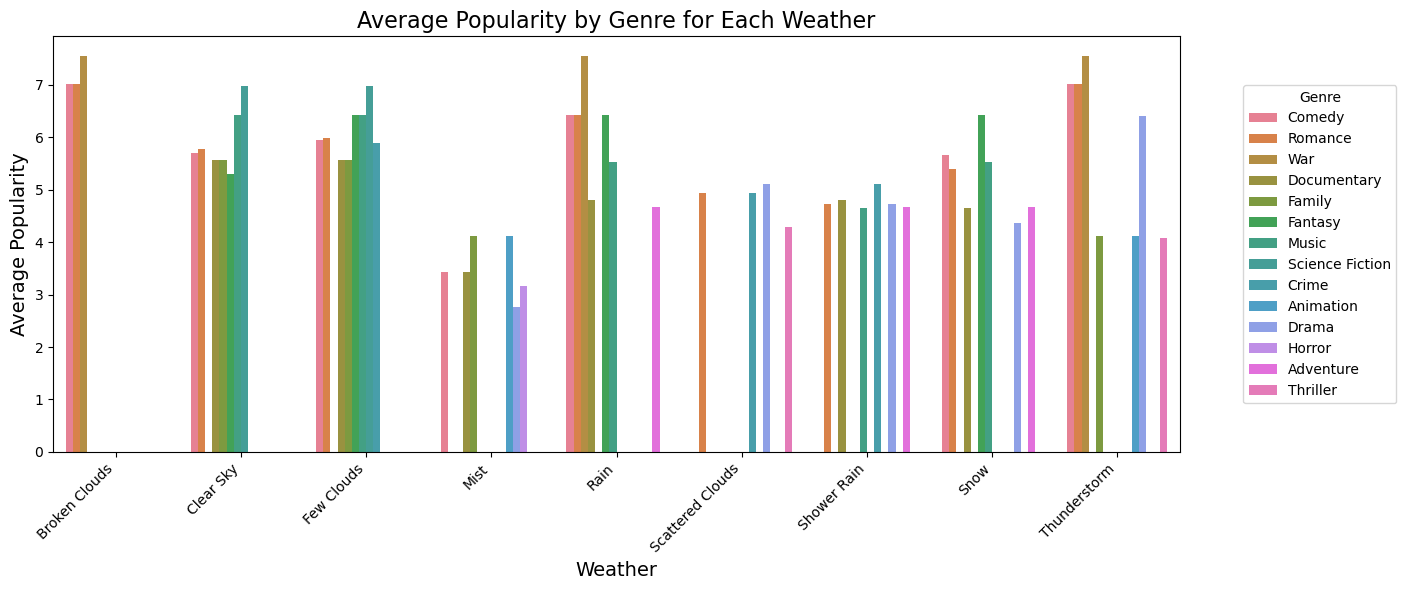

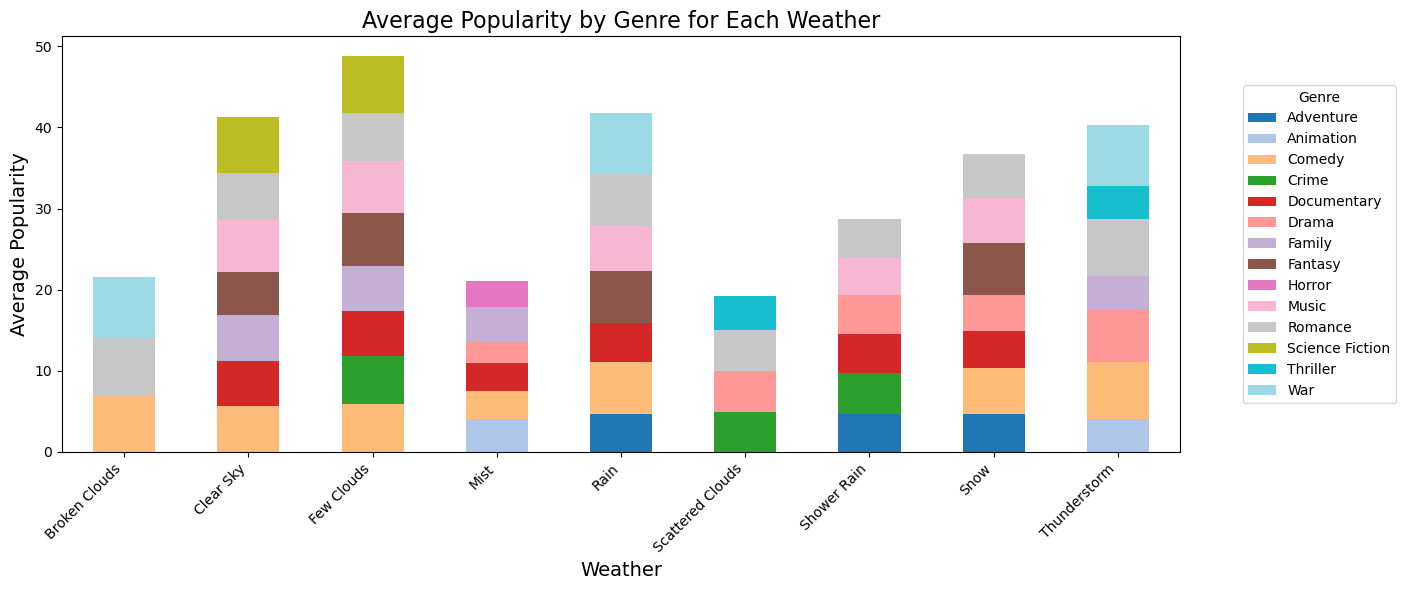

In [ ]:
data = []

# Loop through all weather types and fetch recommendations dynamically
for weather in Preliminary_Model.weather_to_cluster.keys():  
    recommendations = Preliminary_Model.recommend_movies(weather)  # Get recommendations as a DataFrame
    
    # Process the recommendations DataFrame
    for _, row in recommendations.iterrows():
        for genre in row["genres"]:  # Iterate through each genre in the genres list
            data.append({
                "Weather": weather,
                "Genre": genre,
                "Popularity": row["popularity"]  # Assume 'popularity' column exists
            })

# Convert the collected data into a DataFrame
df = pd.DataFrame(data)


avg_popularity = df.groupby(["Weather", "Genre"])["Popularity"].mean().reset_index()

plt.figure(figsize=(12, 6))

# Step 3: Use Seaborn to create a barplot with "Weather" on the x-axis, "Popularity" on the y-axis, and hue as "Genre"
sns.barplot(data=avg_popularity, x="Weather", y="Popularity", hue="Genre", ci=None)

plt.title("Average Popularity by Genre for Each Weather", fontsize=16)
plt.xlabel("Weather", fontsize=14)
plt.ylabel("Average Popularity", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.tight_layout()
plt.legend(title="Genre", bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.savefig("images/predicted/avg_popularity_by_genre.png", dpi=300, bbox_inches='tight')
plt.show()

pivot_table = avg_popularity.pivot(index="Weather", columns="Genre", values="Popularity").fillna(0)


# Plot each genre's popularity as a stacked bar
pivot_table.plot(kind="bar", stacked=True, figsize=(12, 6), colormap='tab20', ax=plt.gca())

plt.title("Average Popularity by Genre for Each Weather", fontsize=16)
plt.xlabel("Weather", fontsize=14)
plt.ylabel("Average Popularity", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.tight_layout()
plt.legend(title="Genre", bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.savefig("images/predicted/avg_popularity_by_genre_stacked.png", dpi=300, bbox_inches='tight')
plt.show()

### Radar Chart (Spider Chart) of Genre Popularity Across Weather Types

In [ ]:
import plotly.express as px
import pandas as pd

# Create a DataFrame for the radar chart
weather_conditions = list(weather_genre_dict.keys())
genres = ['Comedy', 'Romance', 'Fantasy', 'Science Fiction', 'Drama', 'Music', 'Crime', 'Family']

genre_frequencies = {genre: [] for genre in genres}

# Loop through all weather conditions and gather the frequency of each genre
for weather in weather_conditions:
    genre_counts = weather_genre_dict[weather]
    for genre in genres:
        genre_count = next((count for g, count in genre_counts if g == genre), 0)
        genre_frequencies[genre].append(genre_count)

# Transform into a Plotly-compatible DataFrame
radar_data = pd.DataFrame(genre_frequencies, index=weather_conditions).reset_index()
radar_data = radar_data.melt(id_vars=["index"], var_name="Genre", value_name="Frequency")
radar_data.rename(columns={"index": "Weather"}, inplace=True)

# Create the radar chart with Plotly
fig = px.line_polar(
    radar_data,
    r="Frequency",
    theta="Genre",
    color="Weather",
    line_close=True,
    title="Genre Popularity Across Weather Types"
)

fig.update_traces(fill='toself', hoverinfo="all")  # Add hover info and filled areas

# Show the chart interactively
fig.show()

# Save as an interactive HTML file
fig.write_html("html/predicted_interactive_genre_popularity_radar_chart.html")

